<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span></li><li><span><a href="#System-parameters" data-toc-modified-id="System-parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>System parameters</a></span></li><li><span><a href="#Sweep-flux" data-toc-modified-id="Sweep-flux-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sweep flux</a></span></li><li><span><a href="#Sweep-cavity-frequency" data-toc-modified-id="Sweep-cavity-frequency-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sweep cavity frequency</a></span></li></ul></div>

# Preamble

In [1]:
import sys
sys.dont_write_bytecode = True
import time
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import qchard_fluxonium as fluxonium
from Fluxonium_hamiltonians import qchard_resonator as resonator
from Fluxonium_hamiltonians import qchard_coupobj as coupobj
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500
%matplotlib inline
figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/HCF paper/'

# System parameters

In [9]:
nlev_lc = 40
nlev_single = 7  # The number of single-qubit levels to show.
take_data_from_input_file = False

if not take_data_from_input_file:
    # Parameters of the first fluxonium.
    E_L = 1 # inductive energy
    E_C = 1.0  # charging energy
    E_J = 4  # Josephson energy
    phi_ext = np.pi  # external phase shift
  
    # Parameters of the coupling resonators
    omega_c = 7.0 
    g = 0.1
    
qubit = fluxonium.Fluxonium(E_J = E_J, E_C=E_C, E_L=E_L, phi_ext=phi_ext, nlev = nlev_single, nlev_lc = nlev_lc)
coupl_res = resonator.Cavity(omega=omega_c, nlev=12)

# Sweep flux

In [10]:
phi_ext = np.linspace(0,1,201)
chi = np.zeros_like(phi_ext)
for idx, phi in enumerate(phi_ext):
    qubit = fluxonium.Fluxonium(E_J = E_J, E_C=E_C, E_L=E_L, phi_ext=2*phi*np.pi, nlev = nlev_single, nlev_lc = nlev_lc)
    system = coupobj.CoupledObjects(qubit, coupl_res,
                                        [coupl_res, qubit, g, 'JC-charge'])
    energies = system.levels()
    e00 = energies[system.level_label('00')]
    e10 = energies[system.level_label('10')]
    e01 = energies[system.level_label('01')]
    e11 = energies[system.level_label('11')]

#     e00 = energies[system.level_label('08')]
#     e10 = energies[system.level_label('18')]
#     e01 = energies[system.level_label('09')]
#     e11 = energies[system.level_label('19')]
    chi[idx] = (e11-e10) - (e01-e00)
np.save(figpath+'/chi_numerical.npy',chi)

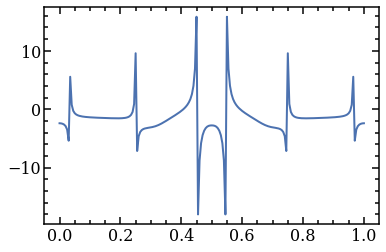

In [11]:
plt.plot(phi_ext,chi*1e3)

# Sweep cavity frequency

In [7]:
wr_array = np.linspace(4,10,301)
chi = np.zeros_like(wr_array)
qubit = fluxonium.Fluxonium(E_J = E_J, E_C=E_C, E_L=E_L, phi_ext=np.pi, nlev = nlev_single, nlev_lc = nlev_lc)

for idx, wr in enumerate(wr_array):
    coupl_res = resonator.Cavity(omega=wr, nlev=12)
    system = coupobj.CoupledObjects(qubit, coupl_res,
                                        [coupl_res, qubit, g, 'JC-charge'])
    energies = system.levels()
    e00 = energies[system.level_label('00')]
    e10 = energies[system.level_label('10')]
    e01 = energies[system.level_label('01')]
    e11 = energies[system.level_label('11')]
    
#     e00 = energies[system.level_label('08')]
#     e10 = energies[system.level_label('18')]
#     e01 = energies[system.level_label('09')]
#     e11 = energies[system.level_label('19')]
    
    chi[idx] = (e11-e10) - (e01-e00)
np.save(figpath+'/chi_numerical_wr.npy',chi)

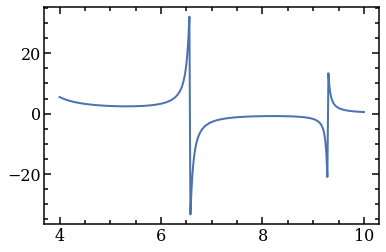

In [8]:
plt.plot(wr_array, chi*1e3)